<a href="https://colab.research.google.com/github/premreddypagadala/neural-networks/blob/main/week3ICP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

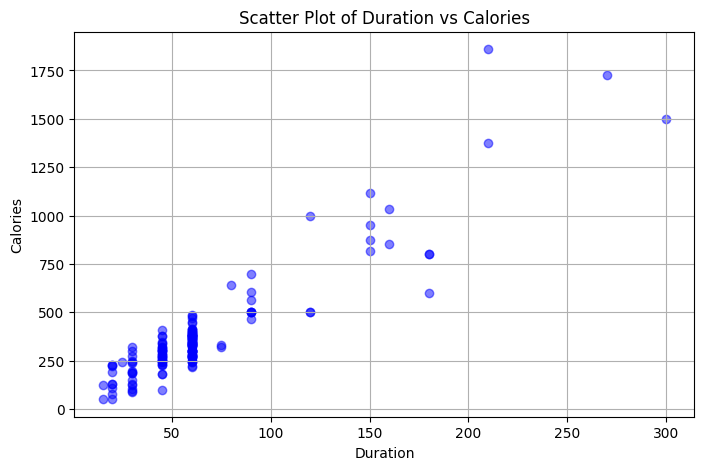

(         Duration       Pulse    Maxpulse     Calories
 count  169.000000  169.000000  169.000000   164.000000
 mean    63.846154  107.461538  134.047337   375.790244
 std     42.299949   14.510259   16.450434   266.379919
 min     15.000000   80.000000  100.000000    50.300000
 25%     45.000000  100.000000  124.000000   250.925000
 50%     60.000000  105.000000  131.000000   318.600000
 75%     60.000000  111.000000  141.000000   387.600000
 max    300.000000  159.000000  184.000000  1860.400000,
 Duration    0
 Pulse       0
 Maxpulse    0
 Calories    5
 dtype: int64,
          Duration     Calories
 min     15.000000    50.300000
 max    300.000000  1860.400000
 count  169.000000   169.000000
 mean    63.846154   375.790244,
     Duration  Pulse  Maxpulse  Calories
 51        80    123       146     643.1
 62       160    109       135     853.0
 65       180     90       130     800.4
 66       150    105       135     873.4
 67       150    107       130     816.0,
     Duratio

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/content/data.csv"
df = pd.read_csv(file_path)

# Display basic statistical description
stats_description = df.describe()

# Check for null values
null_values = df.isnull().sum()

# Replace null values with column mean
df.fillna(df.mean(), inplace=True)

# Aggregate data for 'Duration' and 'Calories'
aggregated_data = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])

# Filter rows where Calories is between 500 and 1000
filtered_df_500_1000 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]

# Filter rows where Calories > 500 and Pulse < 100
filtered_df_calories_pulse = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]

# Create a new dataframe excluding 'Maxpulse'
df_modified = df.drop(columns=['Maxpulse'])

# Remove 'Maxpulse' column from the main dataframe
df.drop(columns=['Maxpulse'], inplace=True)

# Convert 'Calories' column to integer datatype
df['Calories'] = df['Calories'].astype(int)

# Create scatter plot for Duration vs Calories
plt.figure(figsize=(8, 5))
plt.scatter(df['Duration'], df['Calories'], color='blue', alpha=0.5)
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("Scatter Plot of Duration vs Calories")
plt.grid(True)
plt.show()

# Display results
stats_description, null_values, aggregated_data.head(), filtered_df_500_1000.head(), filtered_df_calories_pulse.head(), df_modified.head(), df.head()


Mean Squared Error: 35301898.887134895


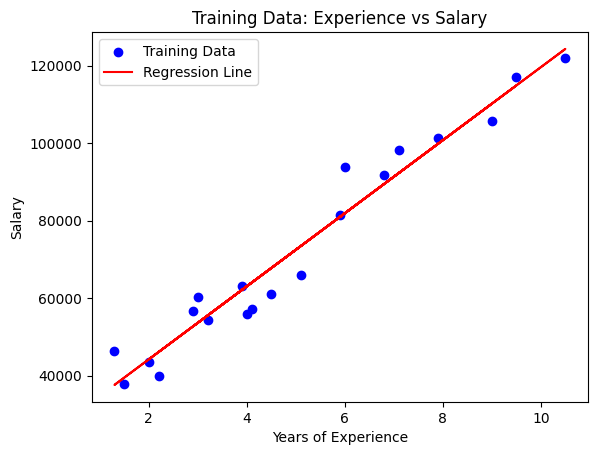

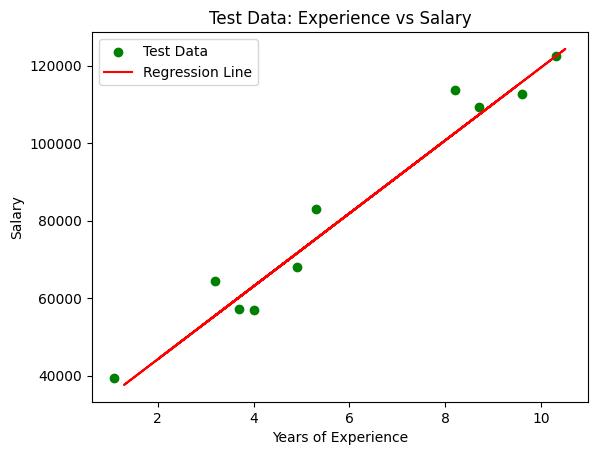

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "/content/Salary_Data (2) (1) (1) (1).csv"  # Change this to the actual path if needed
df = pd.read_csv(file_path)

# Split data into input (X) and output (y) variables
X = df[['YearsExperience']]
y = df['Salary']

# Split data into training and testing sets (1/3 reserved for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict salaries
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualization of Training Data
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_train, model.predict(X_train), color='red', label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Training Data: Experience vs Salary")
plt.legend()
plt.show()

# Visualization of Test Data
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_train, model.predict(X_train), color='red', label="Regression Line")  # Same line as training
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Test Data: Experience vs Salary")
plt.legend()
plt.show()
